In [1]:
import numpy as np
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system (nonlineal).
    
    F=-kx + zx³
    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, z1, z2, F1, F2, u1, u2= p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + z1 * (x1 - L1)**3 + k2 * (x2 - x1 - L2) + z1* (x1 - x2 - L2)**3 + F1 * np.cos(u1 * t)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + z2 * (x2 - x1 -L2)**3 + F2 * np.cos(u2 * t) ) / m2]
    return f

In [2]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 2.0/5.0
k2 = 1.0
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 1.0/10.0
b2 = 1.0/5.0
#nonlinearity coefficients
z1 = 1.0/6.0
z2 = 1.0/10.0
#angular frecuency
u1 = 1
u2 = 3.0/5.0
#Forces
F1 = 1.0/3.0
F2 = 1.0/5.0
# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.7
y1 = 0.0
x2 = 0.1
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 150.0
numpoints = 750

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, z1, z2, F1, F2, u1, u2 ]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springsf.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], file = f)

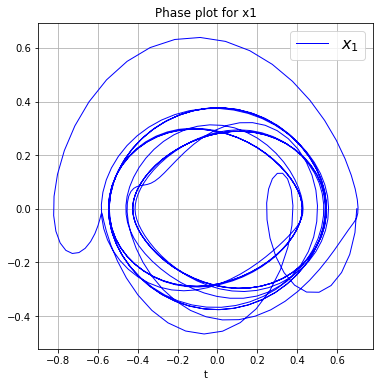

In [3]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, xy, x2, y2 = loadtxt('two_springsf.dat', unpack=True)

figure(1, figsize=(6, 6))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(x1, xy, 'b', linewidth=lw)
#plot(x2, y2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Phase plot for x1')
savefig('phaseplot4.1_1.png', dpi=100)

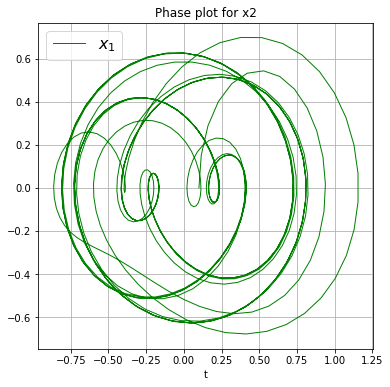

In [4]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, xy, x2, y2 = loadtxt('two_springsf.dat', unpack=True)

figure(1, figsize=(6, 6))

xlabel('t')
grid(True)
#hold(True)
lw = 1

#plot(x1, xy, 'b', linewidth=lw)
plot(x2, y2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Phase plot for x2')
savefig('phaseplot4.1_2.png', dpi=100)

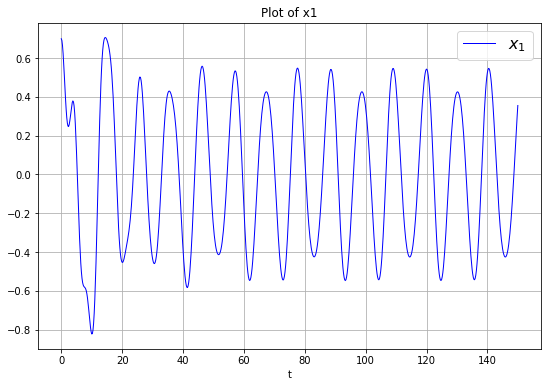

In [5]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, xy, x2, y2 = loadtxt('two_springsf.dat', unpack=True)

figure(1, figsize=(9, 6))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
#plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Plot of x1')
savefig('plot4.1_3.png', dpi=100)

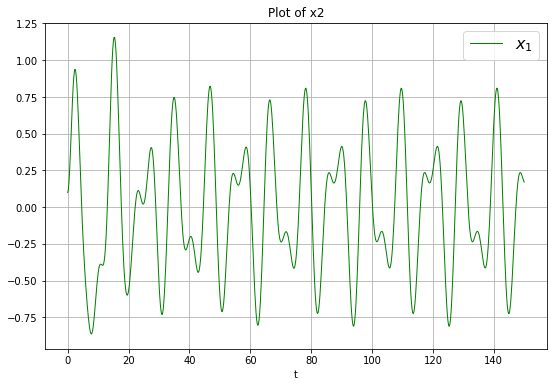

In [6]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, xy, x2, y2 = loadtxt('two_springsf.dat', unpack=True)

figure(1, figsize=(9, 6))

xlabel('t')
grid(True)
#hold(True)
lw = 1

#plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Plot of x2')
savefig('plot4.1_4.png', dpi=100)

In [7]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 2.0/5.0
k2 = 1.0
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 1.0/10.0
b2 = 1.0/5.0
#nonlinearity coefficients
z1 = 1.0/6.0
z2 = 1.0/10.0
#angular frecuency
u1 = 1
u2 = 3.0/5.0
#Forces
F1 = 1.0/3.0
F2 = 1.0/5.0
# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.7
y1 = 0.0
x2 = 0.1
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 5000.0
numpoints = 10000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, z1, z2, F1, F2, u1, u2 ]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springsf_1.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], file = f)

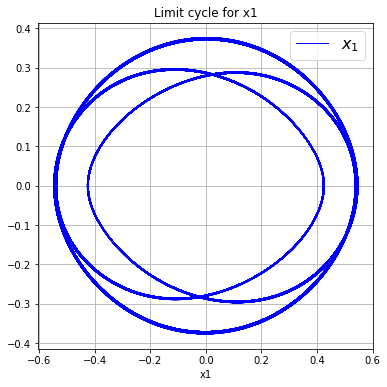

In [8]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, xy, x2, y2 = loadtxt('two_springsf_1.dat', unpack=True, skiprows=1500)

figure(1, figsize=(6, 6))

xlabel('x1')
grid(True)
#hold(True)
lw = 1

plot(x1, xy, 'b', linewidth=lw)
#plot(x2, y2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Limit cycle for x1')
savefig('phaseplot4.1_5.png', dpi=100)

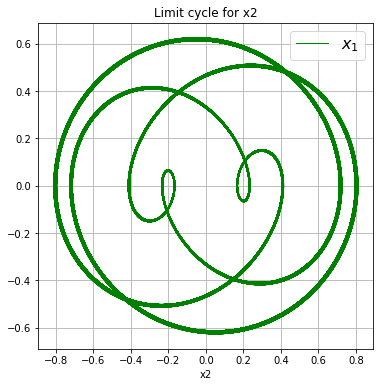

In [9]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, xy, x2, y2 = loadtxt('two_springsf_1.dat', unpack=True, skiprows=1500)

figure(1, figsize=(6, 6))

xlabel('x2')
grid(True)
#hold(True)
lw = 1

#plot(x1, xy, 'b', linewidth=lw)
plot(x2, y2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Limit cycle for x2')
savefig('phaseplot4.1_6.png', dpi=100)

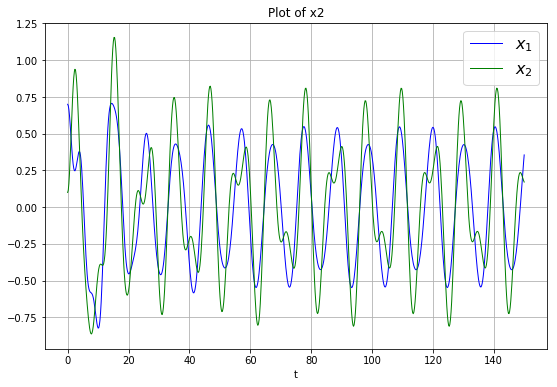

In [10]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, xy, x2, y2 = loadtxt('two_springsf.dat', unpack=True)

figure(1, figsize=(9, 6))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Plot of x2')
savefig('plot4.1_7.png', dpi=100)

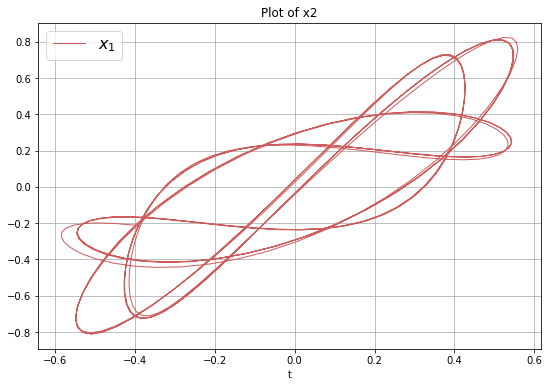

In [12]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, xy, x2, y2 = loadtxt('two_springsf.dat', unpack=True, skiprows=200)

figure(1, figsize=(9, 6))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(x1, x2, 'indianred', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Plot of x2')
savefig('plot4.1_8.png', dpi=100)